In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict the amount of purchase

# Load the data

In [2]:
# Loading the data - we decided to work with a subset of our dataset because of our limited computational power during the experiments
df_original = pd.read_csv('../../Data/Modeling/black_friday_processed_100K.csv')
df = df_original.copy()
print(df.columns)
df.head()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [3]:
print(df.shape)
print(df.dtypes)

(99999, 12)
User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object


# Feature Engineering 

In [4]:
# Removing unnecessary columns
del df['User_ID']
del df['Product_ID']

# Transforming the categorical columns to numerical
for col in ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
    df_dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, df_dummies], axis=1)
    # Remove the original columns
    del df[col]
df.head()

,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_3_9,Product_Category_3_10,Product_Category_3_11,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18
0,8370,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15200,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1422,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1057,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7969,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.dtypes

Purchase                 int64
Gender_F                 uint8
Gender_M                 uint8
Age_0-17                 uint8
Age_18-25                uint8
Age_26-35                uint8
Age_36-45                uint8
Age_46-50                uint8
Age_51-55                uint8
Age_55+                  uint8
Occupation_0             uint8
Occupation_1             uint8
Occupation_2             uint8
Occupation_3             uint8
Occupation_4             uint8
Occupation_5             uint8
Occupation_6             uint8
Occupation_7             uint8
Occupation_8             uint8
Occupation_9             uint8
Occupation_10            uint8
Occupation_11            uint8
Occupation_12            uint8
Occupation_13            uint8
Occupation_14            uint8
Occupation_15            uint8
Occupation_16            uint8
Occupation_17            uint8
Occupation_18            uint8
Occupation_19            uint8
                         ...  
Product_Category_2_5     uint8
Product_

In [6]:
# Selecting the columns
X_columns = [x for x in df.columns if x != 'Purchase'] # and df.loc[:,x].dtype != object]
y_column = ['Purchase']
list(X_columns)

['Gender_F',
 'Gender_M',
 'Age_0-17',
 'Age_18-25',
 'Age_26-35',
 'Age_36-45',
 'Age_46-50',
 'Age_51-55',
 'Age_55+',
 'Occupation_0',
 'Occupation_1',
 'Occupation_2',
 'Occupation_3',
 'Occupation_4',
 'Occupation_5',
 'Occupation_6',
 'Occupation_7',
 'Occupation_8',
 'Occupation_9',
 'Occupation_10',
 'Occupation_11',
 'Occupation_12',
 'Occupation_13',
 'Occupation_14',
 'Occupation_15',
 'Occupation_16',
 'Occupation_17',
 'Occupation_18',
 'Occupation_19',
 'Occupation_20',
 'City_Category_A',
 'City_Category_B',
 'City_Category_C',
 'Stay_In_Current_City_Years_0',
 'Stay_In_Current_City_Years_1',
 'Stay_In_Current_City_Years_2',
 'Stay_In_Current_City_Years_3',
 'Stay_In_Current_City_Years_4+',
 'Marital_Status_0',
 'Marital_Status_1',
 'Product_Category_1_1',
 'Product_Category_1_2',
 'Product_Category_1_3',
 'Product_Category_1_4',
 'Product_Category_1_5',
 'Product_Category_1_6',
 'Product_Category_1_7',
 'Product_Category_1_8',
 'Product_Category_1_9',
 'Product_Category

# Model Training

In [7]:
# Spliting the data using sklearn train_test_split
threshold = 0.8
X = df[X_columns]
y = df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (79999, 92)
y_train (79999, 1)
X_test (20000, 92)
y_test (20000, 1)


# Model Evaluation

# Experiments

Linear Regression
MAE 2272.29015
RMSE 3016.3406515594356


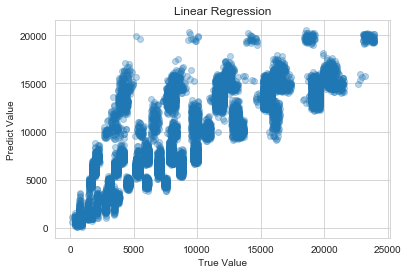


KNN 2
MAE 2803.616325
RMSE 3875.1771265437014


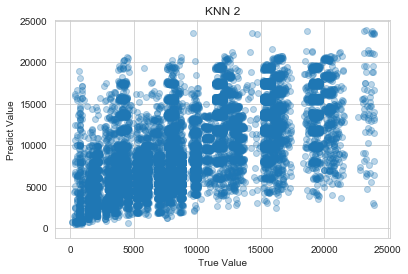


KNN 5
MAE 2628.02621
RMSE 3564.042873898405


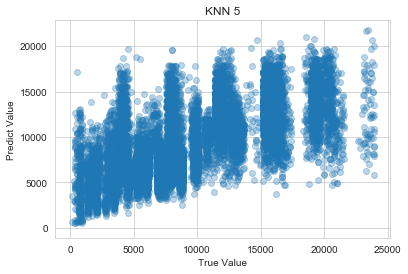


Decision Tree
MAE 2627.487753694361
RMSE 3756.1111516632977


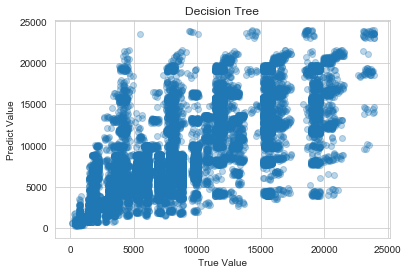

/home/coastrock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest 10
MAE 2335.2851447485195
RMSE 3208.9241526197925


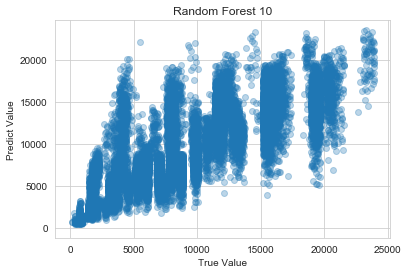

/home/coastrock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest 100
MAE 2295.979067749038
RMSE 3141.974022721034


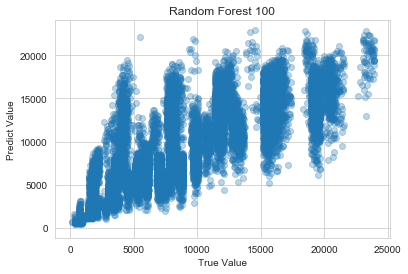

In [8]:
def model_training(model_name, model, X_train, y_train):
    model.fit(X_train, y_train)
    return model
    
def model_prediction(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

def model_evaluation(model_name, y_test, y_pred):
    print(model_name)
    print('MAE', mean_absolute_error(y_test, y_pred))
    print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
    plt.title(model_name)
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.show()
    print('')

def run_experiment(model_name, model, X_train, y_train, X_test):
    train_model = model_training(model_name, model, X_train, y_train)
    predictions = model_prediction(train_model, X_test)
    model_evaluation(model_name, y_test, predictions)
    
run_experiment('Linear Regression', LinearRegression(), X_train, y_train, X_test)
run_experiment('KNN 2', KNeighborsRegressor(2), X_train, y_train, X_test)
run_experiment('KNN 5', KNeighborsRegressor(5), X_train, y_train, X_test)
run_experiment('Decision Tree', DecisionTreeRegressor(), X_train, y_train, X_test)
run_experiment('Random Forest 10', RandomForestRegressor(10), X_train, y_train, X_test)
run_experiment('Random Forest 100', RandomForestRegressor(100), X_train, y_train, X_test)


# Cross Validation

In [9]:
# Evaluating our machine learning models based in our data sample
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100, n_jobs=4)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]

k = 5
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'mae':[], 'rmse':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train_k, X_test_k = X.values[train_index], X.values[test_index]
        y_train_k, y_test_k = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train_k, y_train_k.ravel())
        y_pred = model.predict(X_test_k)
        mae = mean_absolute_error(y_test_k, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test_k, y_pred))
        results[m[0]]['mae'].append(mae)
        results[m[0]]['rmse'].append(rmse)

MODEL LinearRegression
MODEL RandomForestRegressor10
MODEL RandomForestRegressor100
MODEL KNeighborsRegressor
MODEL DecisionTreeRegressor


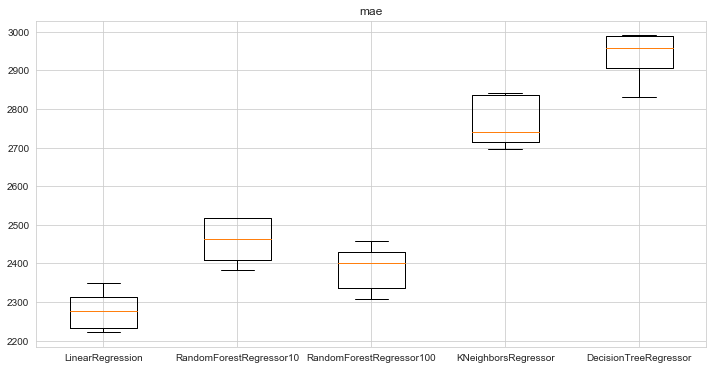

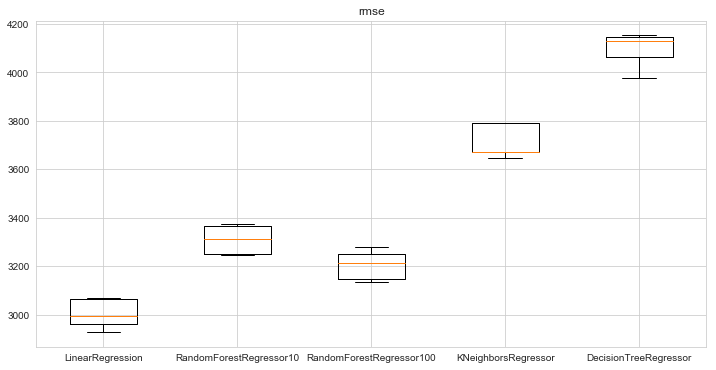

In [10]:
# Plotting the results of our evaluation
for metric in ['mae', 'rmse']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()

# Error Analysis

In [11]:
# Choosing one model to work with based on the results
model = RandomForestRegressor(100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/home/coastrock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# Verifying which are the most important features
fi = []
for i, col in enumerate(X_test.columns):
    fi.append([col, model.feature_importances_[i]])
pd.DataFrame(fi).sort_values(1, ascending=False)

,0,1
40,Product_Category_1_1,0.279634
45,Product_Category_1_6,0.113039
49,Product_Category_1_10,0.062126
55,Product_Category_1_16,0.044595
41,Product_Category_1_2,0.034875
54,Product_Category_1_15,0.032080
46,Product_Category_1_7,0.029767
42,Product_Category_1_3,0.022576
47,Product_Category_1_8,0.021262
44,Product_Category_1_5,0.018791


As we can observe, the 10 first most important features are related to Product_Category_1.

In [13]:
X_test.head()

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,...,Product_Category_3_9,Product_Category_3_10,Product_Category_3_11,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18
98326,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26560,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
42618,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9688,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21355,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Verifying the absolute error for predicted purchase amounts
df_test = pd.DataFrame(X_test).copy()
df_test['Purchase'] = y_test
df_test['prediction'] = y_pred
df_test['abs_error'] = abs(df_test['Purchase']-df_test['prediction'])
df_test.sort_values(by='abs_error', ascending=False).round()

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,...,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18,Purchase,prediction,abs_error
72173,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,4337,19465.0,15128.0
8881,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4496,19295.0,14799.0
30757,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,4313,18847.0,14534.0
22082,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,3969,18352.0,14383.0
514,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,19247,5050.0,14197.0
98474,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4189,18284.0,14095.0
8184,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,5350,19403.0,14053.0
86642,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3965,18017.0,14052.0
26777,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,4330,18351.0,14021.0
80207,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,3990,17982.0,13992.0


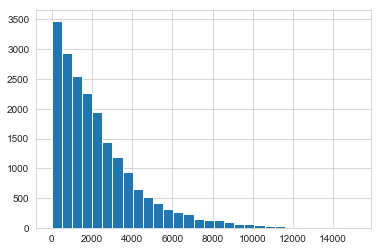

In [15]:
# Plotting the absolute error
plt.hist(df_test['abs_error'], bins=30)
plt.show()
plt.cla()
plt.clf()
plt.close()

In [16]:
df_error = df_test[df_test['abs_error']>15000]
print(len(df_error))
df_error.head()

38


,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,...,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18,Purchase,prediction,abs_error
18099,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4395,17623.217143,13228.217143
64917,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,3893,17406.743333,13513.743333
57265,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4545,18313.133607,13768.133607
76884,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,4491,18006.556667,13515.556667
514,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,19247,5050.255155,14196.744845


In [17]:
df_error.describe()

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,...,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18,Purchase,prediction,abs_error
count,38.000000,38.000000,38.0,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.0,38.0,38.000000,38.0,38.000000,38.000000,38.0,38.000000,38.000000,38.000000
mean,0.315789,0.684211,0.0,0.236842,0.394737,0.184211,0.078947,0.078947,0.026316,0.131579,...,0.0,0.0,0.026316,0.0,0.078947,0.131579,0.0,4730.552632,17426.831481,13443.475947
std,0.471069,0.471069,0.0,0.430851,0.495355,0.392859,0.273276,0.273276,0.162221,0.342570,...,0.0,0.0,0.162221,0.0,0.273276,0.342570,0.0,2600.182340,2375.151488,703.296040
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,3657.000000,5050.255155,12512.322500
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,3966.000000,16866.979250,12732.696518
50%,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,4157.000000,17593.223321,13423.871167
75%,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,4443.000000,18305.769372,13978.774000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,19247.000000,22657.091905,15127.615000


In [18]:
df_error.corr()['abs_error'].dropna().sort_values()

Age_26-35                       -0.357550
City_Category_A                 -0.286480
Occupation_17                   -0.277931
Gender_M                        -0.271956
Stay_In_Current_City_Years_1    -0.257753
City_Category_C                 -0.256321
Occupation_20                   -0.217354
Occupation_7                    -0.199368
Product_Category_1_1            -0.176228
Product_Category_1_14           -0.174989
Product_Category_3_9            -0.172741
Product_Category_3_14           -0.155290
Product_Category_3_16           -0.143582
Occupation_12                   -0.129434
Product_Category_2_2            -0.113590
Marital_Status_0                -0.111026
Age_51-55                       -0.106450
Occupation_0                    -0.105165
Product_Category_2_15           -0.097179
Product_Category_1_16           -0.074764
Stay_In_Current_City_Years_4+   -0.072059
Age_46-50                       -0.067554
Product_Category_2_5            -0.065475
Product_Category_3_5            -0

In [19]:
df[df['Age_18-25']==1][['Gender_M']].head()

,Gender_M
70,0
71,0
72,0
73,0
74,0
